In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from GetData import *


In [169]:
O4_events_BBH.columns

Index(['eventid', 'chirp_mass', 'far', 'mass1', 'mass2', 'snr', 'spin1z',
       'spin2z', 'template_duration', 'likelihood', 'group', 'group_name',
       'chisq', 'total_mass', 'mass_ratio', 'mass_dos',
       'network_matched_filter_snr', 'combined_far', 'M_tot',
       'luminosity_distance', 'luminosity_distance_error'],
      dtype='object')

In [170]:
O3_all.columns

Index(['name', 'simple_name', 'catalog', 'confidence', 'version', 'group_name',
       'group', 'gps', 'far', 'snr', 'network_matched_filter_snr_lower',
       'network_matched_filter_snr_upper', 'mass1', 'mass2', 'chirp_mass',
       'chirp_mass_source_lower', 'chirp_mass_source_upper', 'redshift',
       'redshift_lower', 'redshift_upper', 'luminosity_distance',
       'luminosity_distance_lower', 'luminosity_distance_upper', 'prob',
       'effective_spin', 'total_mass', 'mass_ratio', 'mass_dos', 'is_O1',
       'is_O2', 'is_O3', 'mass_1_source', 'mass_2_source',
       'network_matched_filter_snr', 'chi_eff', 'chirp_mass_source',
       'combined_far', 'p_astro', 'M_tot'],
      dtype='object')

In [171]:
O3_all_predicted.columns

Index(['Unnamed: 0', 'eventid', 'chirp_mass', 'far', 'mass1', 'mass2', 'snr',
       'spin1z', 'spin2z', 'template_duration', 'chisq', 'likelihood', 'group',
       'group_name', 'total_mass', 'mass_ratio', 'mass_dos',
       'luminosity_distance'],
      dtype='object')

Not all variables are available unless we use the "O4_events_BBH" dataset.

$$\Delta E=4\pi\omega d^2_Lt_{dur}\text{SNR}N_{thresh}$$

In [172]:
(c_out**5)/(4*G)

9.070637261028201e+51

In [173]:
#m = 0.8003270810708438
#b = 7.534448682703253
c = 299792458
G = 6.6743e-11
#SNR_scale_factor = 1.6

N_thresh=1e-23
omega=2*np.pi*75
epsilon = 0.04

In [174]:
sub_df_O3 = O3_all_predicted[(O3_all_predicted["template_duration"]>0) & (O3_all_predicted["template_duration"]<6) & (O3_all_predicted["luminosity_distance"]>0)]
sub_df_O3["energy_emission"] = ((c**3)/(4*G))*((sub_df_O3["luminosity_distance"]*omega*sub_df_O3["snr"]*N_thresh*3.086e+22)**2)*sub_df_O3["template_duration"]
sub_df_O3["act_energy_emission"] = epsilon*(sub_df_O3["total_mass"]*1.989e+30)*(c**2)

sub_df_O4 = O4_events_BBH[(O4_events_BBH["template_duration"]>0) & (O4_events_BBH["template_duration"]<10) & (O4_events_BBH["luminosity_distance"]>0)]
sub_df_O4["energy_emission"] = ((c**3)/(4*G))*((sub_df_O4["luminosity_distance"]*omega*sub_df_O4["snr"]*N_thresh*3.086e+22)**2)*sub_df_O4["template_duration"]
sub_df_O4["act_energy_emission"] = epsilon*(sub_df_O4["total_mass"]*1.989e+30)*(c**2)

C:\Users\lucas\AppData\Local\Temp\ipykernel_1900\2764239881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_O3["energy_emission"] = ((c**3)/(4*G))*((sub_df_O3["luminosity_distance"]*omega*sub_df_O3["snr"]*N_thresh*3.086e+22)**2)*sub_df_O3["template_duration"]
C:\Users\lucas\AppData\Local\Temp\ipykernel_1900\2764239881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_O3["act_energy_emission"] = epsilon*(sub_df_O3["total_mass"]*1.989e+30)*(c**2)
C:\Users\lucas\AppData\Local\Temp\ipykernel

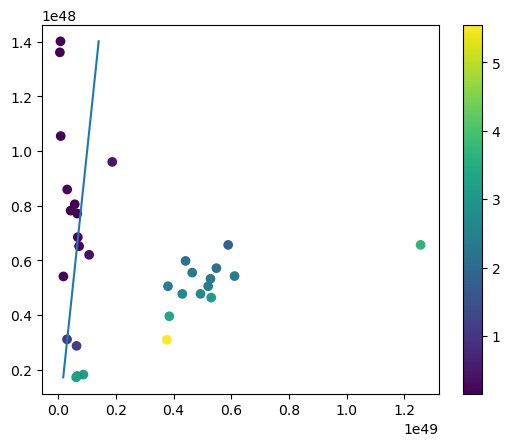

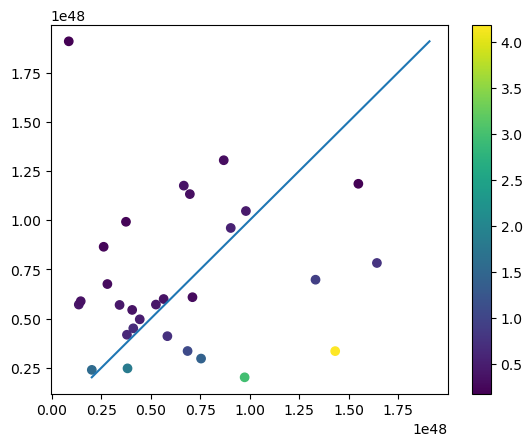

In [175]:
plt.scatter(sub_df_O3["energy_emission"], sub_df_O3["act_energy_emission"], c=sub_df_O3["template_duration"])
plt.colorbar()
plt.plot([np.min(sub_df_O3["act_energy_emission"]), np.max(sub_df_O3["act_energy_emission"])], [np.min(sub_df_O3["act_energy_emission"]), np.max(sub_df_O3["act_energy_emission"])])
plt.show()

plt.scatter(sub_df_O4["energy_emission"], sub_df_O4["act_energy_emission"], c=sub_df_O4["template_duration"])
plt.colorbar()
plt.plot([np.min(sub_df_O4["act_energy_emission"]), np.max(sub_df_O4["act_energy_emission"])], [np.min(sub_df_O4["act_energy_emission"]), np.max(sub_df_O4["act_energy_emission"])])
plt.show()